# (MPG) - miles per gallon

## Import Libraries and Data

In [1]:
from IPython.display import HTML, display

import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

import pandas as pd

df = pd.read_csv('CarData.csv', encoding='latin-1')

df.drop(['NAME','YEAR'], axis = 1, inplace = True)

target = df['MPG']
target1 = np.log(df['MPG'])
df.drop(['MPG'],axis = 1,inplace = True) 

## First Trial of OLS

In [2]:
#BASIC OLS WITH USING ALL FEATURES
df_1 = sm.add_constant(df) 
lm = sm.OLS(target,df_1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 23 Mar 2020   Prob (F-statistic):          3.70e-106
Time:                        17:10:41   Log-Likelihood:                -1101.9
No. Observations:                 392   AIC:                             2220.
Df Residuals:                     384   BIC:                             2252.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9719      3.889      7.965      0.0

#### Dispersion of residuals

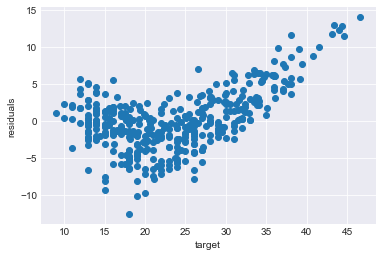

In [3]:
x = target
y = lm.resid

plt.scatter(x, y)
plt.xlabel("target")
plt.ylabel("residuals")
plt.show()

### Feature Graphs

In [4]:
#implement Log transformation to the target
target = target1

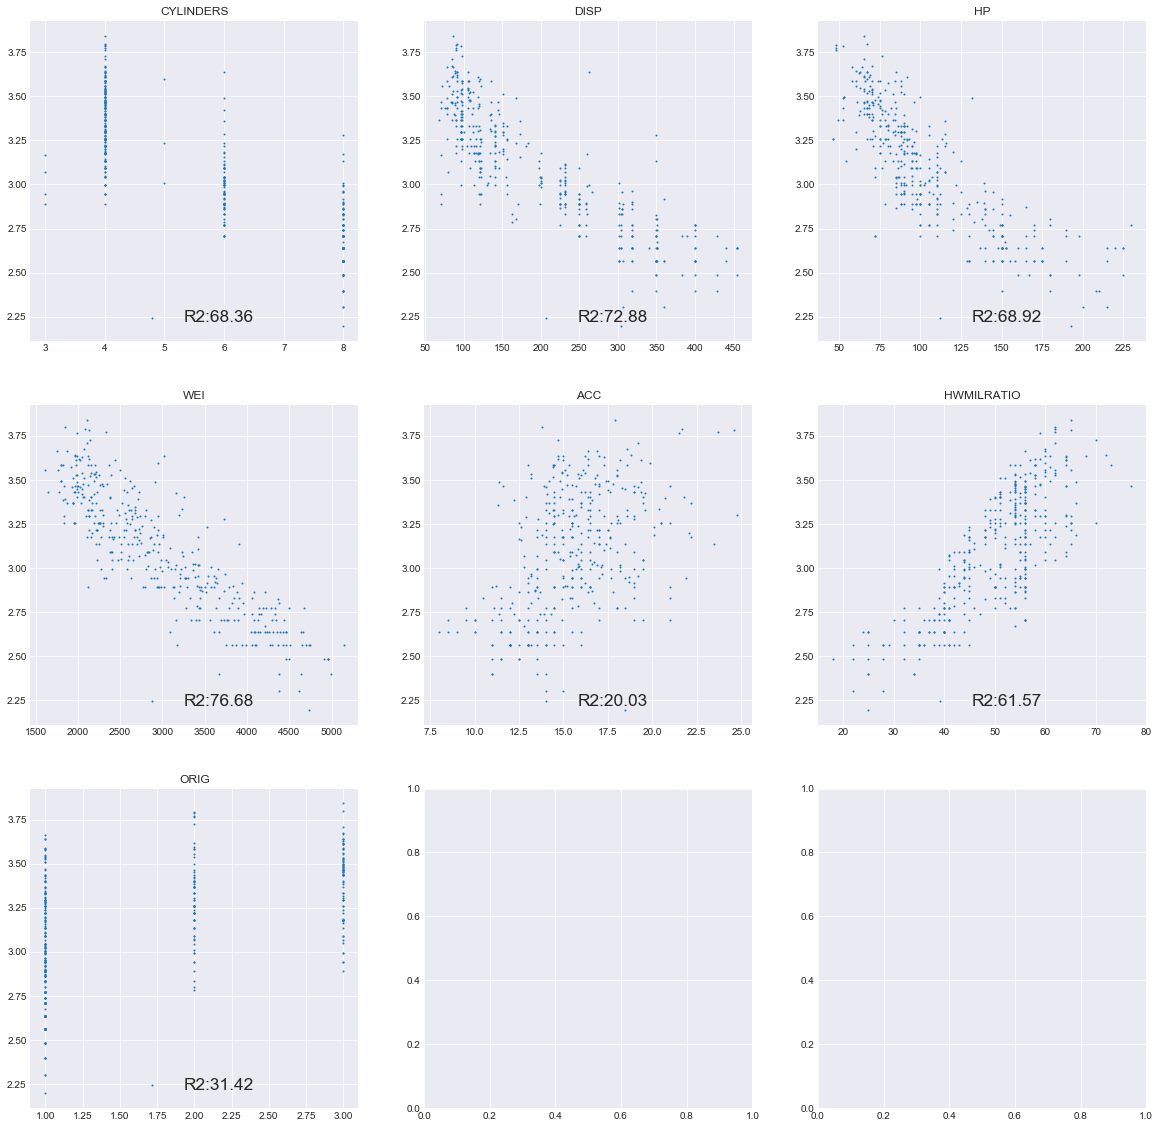

In [5]:
#SFA OF EVERY FEATURE
plt.subplots(3,3,figsize=(20,20))
for i in range(0,len(df.columns)):
    #test our OLS model
    test_a = sm.add_constant(df.iloc[:,i]) 
    reg1 = sm.OLS(endog=target, exog=test_a, missing='none')
    results = reg1.fit().rsquared
    #Graphs
    plt.subplot(3,3,1+i).set_title(df.columns[i])
    plt.scatter(df.iloc[:,i], target, s=1)
    #legend = plt.legend(loc='lower center', shadow=True, fontsize='x-large')
    #legend.set_label('aaa')
    # Put a nicer background color on the legend.
    #legend.get_frame().set_facecolor('C0')
    plt.legend(['R2:' + str(round(results*100,2))], loc = 8,fontsize = 'xx-large', numpoints = 4)

## Feature Creation

In [6]:
#Creates arrays of selected number of combinations of a set of features.
import itertools
def findsubsets(s, n): 
    return list(itertools.combinations(s, n)) 

#combinations of features with 2 member subsets
s = list(df.columns)
n = 2
comb_lists = findsubsets(s, n)

#Divides every feature to another
for column1,column2 in comb_lists: 
    df[column1 + column2] = df[column1] / df[column2]
    
#Makes log transformation of every original and newly created features
for column in df.columns: 
    df['L'+column] = np.log(df[column])
    
#Backward Elimination
cols = list(df.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = df[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(target,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.08):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CYLINDERS', 'DISP', 'HP', 'WEI', 'ACC', 'HWMILRATIO', 'ORIG', 'CYLINDERSACC', 'CYLINDERSHWMILRATIO', 'DISPHP', 'DISPWEI', 'DISPHWMILRATIO', 'DISPORIG', 'HPACC', 'HPORIG', 'WEIACC', 'WEIHWMILRATIO', 'ACCORIG', 'HWMILRATIOORIG', 'LACC', 'LWEIORIG']


### Create Subsets and try every possible combination

In [7]:
#The outcome of prior code is our optimum subset
optimum_subset = ['CYLINDERS',
                 'HP',
                 'CYLINDERSHWMILRATIO',
                 'DISPHWMILRATIO',
                 'DISPORIG',
                 'HPORIG',
                 'LWEIORIG']

In [8]:
#BASIC OLS WITH USING ALL FEATURES
df_1 = sm.add_constant(df[optimum_subset]) 
lm = sm.OLS(target,df_1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     301.0
Date:                Mon, 23 Mar 2020   Prob (F-statistic):          1.26e-151
Time:                        17:10:44   Log-Likelihood:                 233.61
No. Observations:                 392   AIC:                            -451.2
Df Residuals:                     384   BIC:                            -419.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.4203    

#### Dispersion of residuals

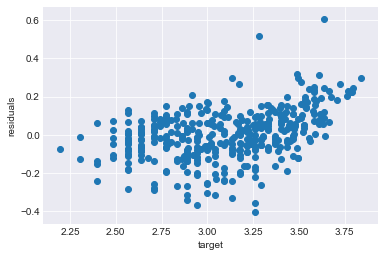

In [9]:
x = target
y = lm.resid

plt.scatter(x, y)
plt.xlabel("target")
plt.ylabel("residuals")
plt.show()

# Final Multicollinearity check with confusion matrix

In [10]:
def correlation_matrix_constructor(df, target_column):
    '''
    Creates a correlation matrix.
    '''
    corrmat = df.corr()
    plt.figure(figsize=(20,10))
    k = 15 #number of variables for heatmap
    cols = corrmat.nlargest(k, target_column)[target_column].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

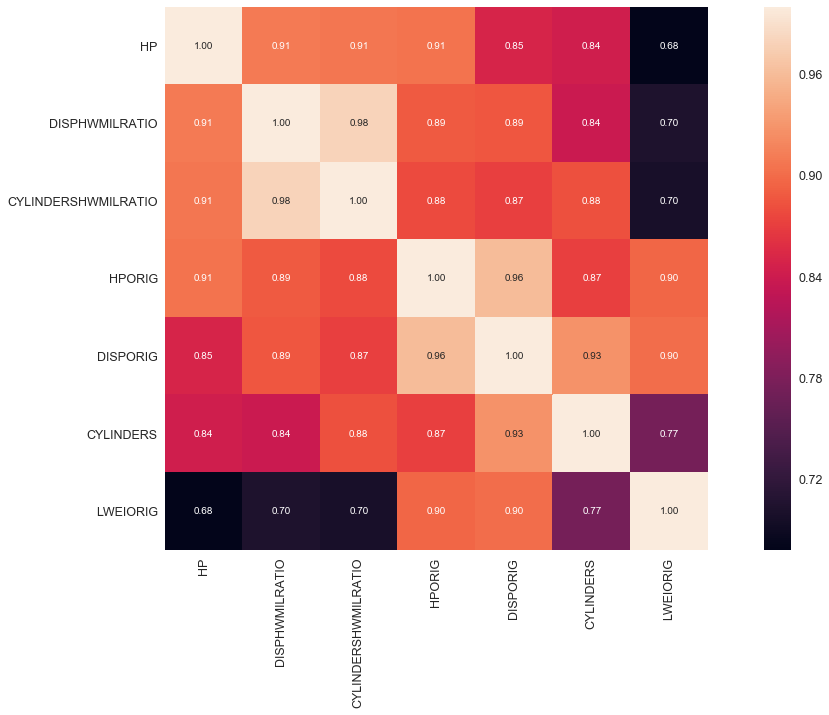

In [11]:
correlation_matrix_constructor(df_1, 'HP')